In [ ]:
# mount drive and change directory to project folder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/520 Final Project"

/content/drive/.shortcut-targets-by-id/1KHBlsdIi36o_ikonJZ-usBVzGPrZlH0V/520 Final Project


In [ ]:
import numpy as np

# Load the training set

In [ ]:
from os import listdir
from os.path import isfile, join
path = "musicnet/musicnet/train_data/"
files = [f for f in listdir(path) if isfile(join(path, f))]

In [ ]:
print(files)

['1727.wav', '1728.wav', '1729.wav', '1730.wav', '1733.wav', '1734.wav', '1735.wav', '1739.wav', '1742.wav', '1749.wav', '1750.wav', '1751.wav', '1752.wav', '1755.wav', '1756.wav', '1757.wav', '1758.wav', '1760.wav', '1763.wav', '1764.wav', '1765.wav', '1766.wav', '1768.wav', '1771.wav', '1772.wav', '1773.wav', '1775.wav', '1776.wav', '1777.wav', '1788.wav', '1789.wav', '1790.wav', '1791.wav', '1792.wav', '1793.wav', '1805.wav', '1807.wav', '1811.wav', '1812.wav', '1813.wav', '1817.wav', '1818.wav', '1822.wav', '1824.wav', '1828.wav', '1829.wav', '1835.wav', '1859.wav', '1872.wav', '1873.wav', '1876.wav', '1893.wav', '1916.wav', '1918.wav', '1919.wav', '1922.wav', '1923.wav', '1931.wav', '1932.wav', '1933.wav', '2075.wav', '2076.wav', '2077.wav', '2078.wav', '2079.wav', '2080.wav', '2081.wav', '2082.wav', '2083.wav', '2104.wav', '2105.wav', '2112.wav', '2113.wav', '2114.wav', '2116.wav', '2117.wav', '2118.wav', '2119.wav', '2127.wav', '2131.wav', '2138.wav', '2140.wav', '2147.wav', '21

In [ ]:
# process the training set from raw audio files
import scipy.io.wavfile
X_train = []
y_train = []
NUM_NOTES = 128
windowsize = 16384
stepsize = windowsize
for filename in files[:60]:
    songnumber = filename.split('.')[0]
    print(songnumber)
    with np.load("musicnet.npz", allow_pickle=True, encoding='latin1') as data:
      tree = data[songnumber][1]
    _, audio = scipy.io.wavfile.read('musicnet/musicnet/train_data/' + filename)
    for i in range(0,len(audio)-windowsize, stepsize):
        X_train += [audio[i:i+windowsize]]
        middle = i + int(windowsize/2)
        indices = []
        for interval in list(tree[middle]):
            indices += [interval[2][1]]
        onehot = np.zeros(NUM_NOTES)
        onehot[indices] = 1
        y_train += [onehot]
X_train = np.array(X_train)
y_train = np.array(y_train)

1727


KeyboardInterrupt: ignored

In [ ]:
import sys
print(X_train.shape)
print(sys.getsizeof(X_train)/1024/1024/1024) # size of X_train in gigabytes
print(sys.getsizeof(y_train)/1024/1024/1024) # size of y_train in gigabytes

In [ ]:
# save training set
import pickle
with open('X_train.npy', 'wb') as f:
  np.save(f, X_train, allow_pickle=True)
with open('y_train.npy', 'wb') as f:
  np.save(f, y_train, allow_pickle=True)

# Do the same thing for the test set



In [ ]:
from os import listdir
from os.path import isfile, join
path = "musicnet/musicnet/test_data/"
files = [f for f in listdir(path) if isfile(join(path, f))]

In [ ]:
print(files)

['1759.wav', '1819.wav', '2106.wav', '2191.wav', '2298.wav', '2303.wav', '2382.wav', '2416.wav', '2556.wav', '2628.wav']


In [ ]:
# process the test set from raw audio files
import scipy.io.wavfile
X_test = []
y_test = []
NUM_NOTES = 128
windowsize = 16384
stepsize = windowsize
for filename in files[:60]:
    songnumber = filename.split('.')[0]
    print(songnumber)
    with np.load("musicnet.npz", allow_pickle=True, encoding='latin1') as data:
      tree = data[songnumber][1]
    _, audio = scipy.io.wavfile.read('musicnet/musicnet/test_data/' + filename)
    for i in range(0,len(audio)-windowsize, stepsize):
        X_test += [audio[i:i+windowsize]]
        middle = i + int(windowsize/2)
        indices = []
        for interval in list(tree[middle]):
            indices += [interval[2][1]]
        onehot = np.zeros(NUM_NOTES)
        onehot[indices] = 1
        y_test += [onehot]
X_test = np.array(X_test)
y_test = np.array(y_test)

1759
1819
2106
2191
2298
2303
2382
2416
2556
2628


In [ ]:
import sys
print(X_test.shape)
print(sys.getsizeof(X_test)/1024/1024/1024) # size of X_test in gigabytes
print(sys.getsizeof(y_test)/1024/1024/1024) # size of y_test in gigabytes

(3981, 16384)
0.24298106878995895
0.003796689212322235


In [ ]:
# save test set
import pickle
with open('X_test.npy', 'wb') as f:
  np.save(f, X_test, allow_pickle=True)
with open('y_test.npy', 'wb') as f:
  np.save(f, y_test, allow_pickle=True)

In [ ]:
import numpy as np
with open("y_train.npy", 'rb') as f:
  y_train = np.load(f)

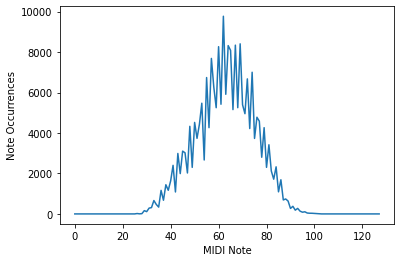

In [ ]:
# plot note frequencies in training set
import matplotlib.pyplot as plt
plt.plot(np.sum(y_train, axis=0))
plt.xlabel('MIDI Note')
plt.ylabel('Note Occurrences')
plt.savefig('NoteOccurrences', dpi=500, bbox_inches='tight')
plt.show()

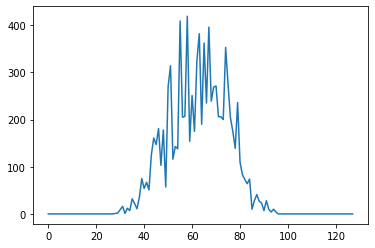

In [ ]:
# plot note frequencies in test set
import matplotlib.pyplot as plt
plt.plot(np.sum(y_test, axis=0))
plt.show() # more erratic but more or less the same

In [ ]:
num_train_occurences = np.sum(y_train, axis=0)

In [ ]:
num_train_occurences[60] # as expected, middle C has by far the most occurences

8268.0

In [ ]:
print(num_train_occurences[40])
print(num_train_occurences[84])
# with this in mind, should probably only attempt to classify notes in these bounds

1634.0
2328.0


# Constant Q transform data instead

In [ ]:
from os import listdir
from os.path import isfile, join
path = "musicnet/musicnet/train_data/"
files = [f for f in listdir(path) if isfile(join(path, f))]

In [ ]:
# modified from documentation: https://librosa.org/doc/main/generated/librosa.cqt.html
import librosa
import librosa.display
import matplotlib.pyplot as plt

X_train_spec = []
y_train_spec = []
NUM_NOTES = 128
windowsize = 16384
hop_size = 512
columns_per_data_point = int(windowsize/hop_size)
for filename in files:
    songnumber = filename.split('.')[0]
    print(songnumber)
    with np.load("musicnet.npz", allow_pickle=True, encoding='latin1') as data:
      tree = data[songnumber][1]
    audio, fs = librosa.load('musicnet/musicnet/train_data/' + filename, sr=None)
    C = np.abs(librosa.cqt(audio, sr=fs))
    for i in range(0, C.shape[1] - columns_per_data_point, columns_per_data_point):
      X_train_spec += [C[:,i:i+columns_per_data_point]]
      middle = i*hop_size + int(windowsize/2)
      indices = []
      for interval in list(tree[middle]):
          indices += [interval[2][1]]
      onehot = np.zeros(NUM_NOTES)
      onehot[indices] = 1
      y_train_spec += [onehot]
X_train_spec = np.array(X_train_spec)
y_train_spec = np.array(y_train_spec)

# save training set
import pickle
with open('X_train_spec.npy', 'wb') as f:
  np.save(f, X_train_spec, allow_pickle=True)
with open('y_train_spec.npy', 'wb') as f:
  np.save(f, y_train_spec, allow_pickle=True)

In [ ]:
from os import listdir
from os.path import isfile, join
path = "musicnet/musicnet/test_data/"
files = [f for f in listdir(path) if isfile(join(path, f))]
print(files)

['1759.wav', '1819.wav', '2106.wav', '2191.wav', '2298.wav', '2303.wav', '2382.wav', '2416.wav', '2556.wav', '2628.wav']


In [ ]:
# modified from documentation: https://librosa.org/doc/main/generated/librosa.cqt.html
import librosa
import librosa.display
import matplotlib.pyplot as plt

X_test_spec = []
y_test_spec = []
NUM_NOTES = 128
windowsize = 16384
hop_size = 512
columns_per_data_point = int(windowsize/hop_size)
for filename in files:
    songnumber = filename.split('.')[0]
    print(songnumber)
    with np.load("musicnet.npz", allow_pickle=True, encoding='latin1') as data:
      tree = data[songnumber][1]
    audio, fs = librosa.load('musicnet/musicnet/test_data/' + filename, sr=None)
    C = np.abs(librosa.cqt(audio, sr=fs))
    for i in range(0, C.shape[1] - columns_per_data_point, columns_per_data_point):
      X_test_spec += [C[:,i:i+columns_per_data_point]]
      middle = i*hop_size + int(windowsize/2)
      indices = []
      for interval in list(tree[middle]):
          indices += [interval[2][1]]
      onehot = np.zeros(NUM_NOTES)
      onehot[indices] = 1
      y_test_spec += [onehot]
X_test_spec = np.array(X_test_spec)
y_test_spec = np.array(y_test_spec)

# save training set
with open('X_test_spec.npy', 'wb') as f:
  np.save(f, X_test_spec, allow_pickle=True)
with open('y_test_spec.npy', 'wb') as f:
  np.save(f, y_test_spec, allow_pickle=True)

1759
1819
2106
2191
2298
2303
2382
2416
2556
2628


In [ ]:
print(X_test_spec.shape)
print(y_test_spec.shape)

(3981, 84, 32)
(3981, 128)


# Visualize constant-Q transform

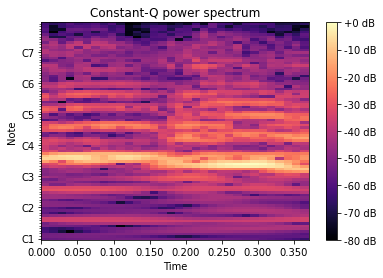

In [ ]:
import matplotlib.pyplot as plt
C = X_test_spec[2000]
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=fs, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

In [ ]:
y_test_spec[2000].nonzero() # looks right

(array([53]),)

# Save version of data in decibels

In [ ]:
import numpy as np
with open("X_train_spec.npy", 'rb') as f:
  X_train_spec = np.load(f)
with open("X_test_spec.npy", 'rb') as f:
  X_test_spec = np.load(f)

In [ ]:
import librosa
X_train_db = []
for i in range(len(X_train_spec)):
  X_train_db += [librosa.amplitude_to_db(X_train_spec[i], ref=np.max)]
X_train_db = np.array(X_train_db)

In [ ]:
with open('X_train_spec_db.npy', 'wb') as f:
  np.save(f, X_train_db, allow_pickle=True)

In [ ]:
X_test_db = []
for i in range(len(X_test_spec)):
  X_test_db += [librosa.amplitude_to_db(X_test_spec[i], ref=np.max)]
X_test_db = np.array(X_test_db)

In [ ]:
with open('X_test_spec_db.npy', 'wb') as f:
  np.save(f, X_test_db, allow_pickle=True)

# Prepare Data for RNN

In [ ]:
from os import listdir
from os.path import isfile, join
path = "musicnet/musicnet/train_data/"
files = [f for f in listdir(path) if isfile(join(path, f))]
print(files)

['1727.wav', '1728.wav', '1729.wav', '1730.wav', '1733.wav', '1734.wav', '1735.wav', '1739.wav', '1742.wav', '1749.wav', '1750.wav', '1751.wav', '1752.wav', '1755.wav', '1756.wav', '1757.wav', '1758.wav', '1760.wav', '1763.wav', '1764.wav', '1765.wav', '1766.wav', '1768.wav', '1771.wav', '1772.wav', '1773.wav', '1775.wav', '1776.wav', '1777.wav', '1788.wav', '1789.wav', '1790.wav', '1791.wav', '1792.wav', '1793.wav', '1805.wav', '1807.wav', '1811.wav', '1812.wav', '1813.wav', '1817.wav', '1818.wav', '1822.wav', '1824.wav', '1828.wav', '1829.wav', '1835.wav', '1859.wav', '1872.wav', '1873.wav', '1876.wav', '1893.wav', '1916.wav', '1918.wav', '1919.wav', '1922.wav', '1923.wav', '1931.wav', '1932.wav', '1933.wav', '2075.wav', '2076.wav', '2077.wav', '2078.wav', '2079.wav', '2080.wav', '2081.wav', '2082.wav', '2083.wav', '2104.wav', '2105.wav', '2112.wav', '2113.wav', '2114.wav', '2116.wav', '2117.wav', '2118.wav', '2119.wav', '2127.wav', '2131.wav', '2138.wav', '2140.wav', '2147.wav', '21

In [ ]:
# modified from documentation: https://librosa.org/doc/main/generated/librosa.cqt.html
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

X_train_RNN = []
y_train_RNN = []
NUM_NOTES = 128
windowsize = 16384
hop_size = 512
columns_per_data_point = int(windowsize/hop_size)
L = 8
for filename in files:
    songnumber = filename.split('.')[0]
    print(songnumber)
    with np.load("musicnet.npz", allow_pickle=True, encoding='latin1') as data:
      tree = data[songnumber][1]
    audio, fs = librosa.load('musicnet/musicnet/train_data/' + filename, sr=None)
    C = librosa.amplitude_to_db(np.abs(librosa.cqt(audio, sr=fs)), ref=np.max)
    splits = []
    labels = []
    for i in range(0, C.shape[1] - columns_per_data_point, columns_per_data_point):
      splits += [C[:,i:i+columns_per_data_point]]
      middle = i*hop_size + int(windowsize/2)
      indices = []
      for interval in list(tree[middle]):
          indices += [interval[2][1]]
      onehot = np.zeros(NUM_NOTES)
      onehot[indices] = 1
      labels += [onehot]
    splits = np.array(splits)
    labels = np.array(labels)
    numsplits = len(splits)
    numsplits = int(np.floor(numsplits/L)*L)
    splits = splits[:numsplits]
    labels = labels[:numsplits]
    splits = splits.reshape((int(numsplits/L), L, -1, columns_per_data_point))
    labels = labels.reshape((int(numsplits/L), L, NUM_NOTES))
    X_train_RNN += list(splits)
    y_train_RNN += list(labels)
X_train_RNN = np.array(X_train_RNN)
y_train_RNN = np.array(y_train_RNN)

# save training set
with open('X_train_RNN_2.npy', 'wb') as f:
  np.save(f, X_train_RNN, allow_pickle=True)
with open('y_train_RNN_2.npy', 'wb') as f:
  np.save(f, y_train_RNN, allow_pickle=True)

1727
1728
1729
1730
1733
1734
1735
1739
1742
1749
1750
1751
1752
1755
1756
1757
1758
1760
1763
1764
1765
1766
1768
1771
1772
1773
1775
1776
1777
1788
1789
1790
1791
1792
1793
1805
1807
1811
1812
1813
1817
1818
1822
1824
1828
1829
1835
1859
1872
1873
1876
1893
1916
1918
1919
1922
1923
1931
1932
1933
2075
2076
2077
2078
2079
2080
2081
2082
2083
2104
2105
2112
2113
2114
2116
2117
2118
2119
2127
2131
2138
2140
2147
2148
2149
2150
2151
2154
2155
2156
2157
2158
2159
2160
2161
2166
2167
2168
2169
2177
2178
2179
2180
2186
2194
2195
2196
2198
2200
2201
2202
2203
2204
2207
2208
2209
2210
2211
2212
2213
2214
2215
2217
2218
2219
2220
2221
2222
2224
2225
2227
2228
2229
2230
2231
2232
2234
2237
2238
2239
2240
2241
2242
2243
2244
2247
2248
2282
2283
2284
2285
2288
2289
2292
2293
2294
2295
2296
2297
2300
2302
2304
2305
2307
2308
2310
2313
2314
2315
2318
2319
2320
2322
2325
2330
2334
2335
2336
2341
2342
2343
2345
2346
2348
2350
2357
2358
2359
2364
2365
2366
2368
2371
2372
2373
2374
2376
2377
2379
2381


In [ ]:
X_train_RNN = np.array(X_train_RNN)
y_train_RNN = np.array(y_train_RNN)
print(X_train_RNN.shape)
print(y_train_RNN.shape)

(16170, 20, 84, 32)
(16170, 20, 84, 32)


In [ ]:
with open('X_train_RNN.npy', 'wb') as f:
  np.save(f, X_train_RNN, allow_pickle=True)
with open('y_train_RNN.npy', 'wb') as f:
  np.save(f, y_train_RNN, allow_pickle=True)

In [ ]:
from os import listdir
from os.path import isfile, join
path = "musicnet/musicnet/test_data/"
files = [f for f in listdir(path) if isfile(join(path, f))]
print(files)

['1759.wav', '1819.wav', '2106.wav', '2191.wav', '2298.wav', '2303.wav', '2382.wav', '2416.wav', '2556.wav', '2628.wav']


In [ ]:
# modified from documentation: https://librosa.org/doc/main/generated/librosa.cqt.html
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

X_test_RNN = []
y_test_RNN = []
NUM_NOTES = 128
windowsize = 16384
hop_size = 512
columns_per_data_point = int(windowsize/hop_size)
L = 8
for filename in files:
    songnumber = filename.split('.')[0]
    print(songnumber)
    with np.load("musicnet.npz", allow_pickle=True, encoding='latin1') as data:
      tree = data[songnumber][1]
    audio, fs = librosa.load('musicnet/musicnet/test_data/' + filename, sr=None)
    C = librosa.amplitude_to_db(np.abs(librosa.cqt(audio, sr=fs)), ref=np.max)
    splits = []
    labels = []
    for i in range(0, C.shape[1] - columns_per_data_point, columns_per_data_point):
      splits += [C[:,i:i+columns_per_data_point]]
      middle = i*hop_size + int(windowsize/2)
      indices = []
      for interval in list(tree[middle]):
          indices += [interval[2][1]]
      onehot = np.zeros(NUM_NOTES)
      onehot[indices] = 1
      labels += [onehot]
    splits = np.array(splits)
    labels = np.array(labels)
    numsplits = len(splits)
    numsplits = int(np.floor(numsplits/L)*L)
    splits = splits[:numsplits]
    labels = labels[:numsplits]
    splits = splits.reshape((int(numsplits/L), L, -1, columns_per_data_point))
    labels = labels.reshape((int(numsplits/L), L, NUM_NOTES))
    X_test_RNN += list(splits)
    y_test_RNN += list(labels)
X_test_RNN = np.array(X_test_RNN)
y_test_RNN = np.array(y_test_RNN)

# save training set
with open('X_test_RNN_2.npy', 'wb') as f:
  np.save(f, X_test_RNN, allow_pickle=True)
with open('y_test_RNN_2.npy', 'wb') as f:
  np.save(f, y_test_RNN, allow_pickle=True)

1759
1819
2106
2191
2298
2303
2382
2416
2556
2628
